# Fair Machine Learning - COMPAS algorithm analysis

Start by importing all kinds of necessary packages.

In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Import COMPAS dataset from ProPublica public repository

In [2]:
url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
df = pd.read_csv(url)
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [3]:
# 7214 data points with 53 attributes
df.shape

(7214, 53)

Plot ethnicity:

<Figure size 576x360 with 0 Axes>

[Text(0.5, 0, 'Ethnicity'),
 Text(0, 0.5, 'Absolute Count'),
 Text(0.5, 1.0, 'Defendants by ethnicity')]

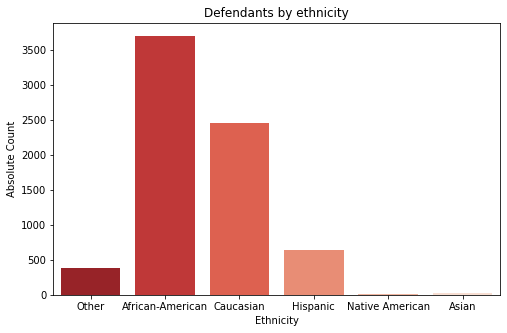

In [4]:
plt.figure(figsize=(8,5))
plot0 = sns.countplot(x="race", data=df, palette='Reds_r')
plot0.set(xlabel='Ethnicity', ylabel='Absolute Count', title='Defendants by ethnicity')

Add attribute african_american that is 1 for african-american people and 0 otherwise:

In [5]:
df['african_american'] = (df['race'] == 'African-American').astype(int)

Plot predictions and highlight ethnic differences:

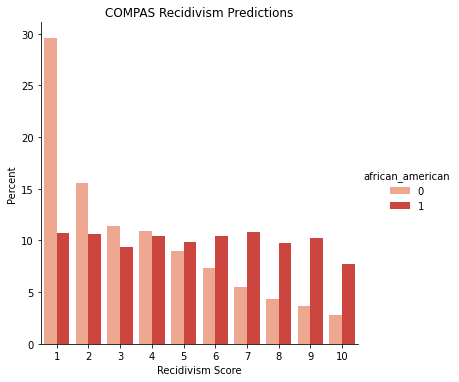

In [6]:
x,y = 'decile_score','african_american'

df_grouped_by_race_risk_decile_scores = (df
.groupby(y)[x]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

plot2a = sns.catplot(x=x, y='percent', hue=y, data=df_grouped_by_race_risk_decile_scores, kind='bar', palette='Reds')
plot2a.set(xlabel='Recidivism Score', ylabel='Percent', title='COMPAS Recidivism Predictions')

Change predictions to binary classification problem:

In [8]:
# High risk if score >= 5, low risk otherwise.
df['high_risk']  = (df['decile_score']>=5).astype(int)

Assign TP, FP, FN and FP to defendants:

In [9]:
# Create function for assigning eval-labels:
def assign_eval(row):
    if row['high_risk'] == 1 and row['two_year_recid'] == 1:
        val = 'TP'
    elif row['high_risk'] == 1 and row['two_year_recid'] == 0:
        val = 'FP'
    elif row['high_risk'] == 0 and row['two_year_recid'] == 1:
        val = 'FN'
    else:
        val = 'TN'
    return val

# Apply function to each defendant:
df['eval'] = df.apply(assign_eval, axis=1)
        

Plot evaluations for sensitive attribute race:

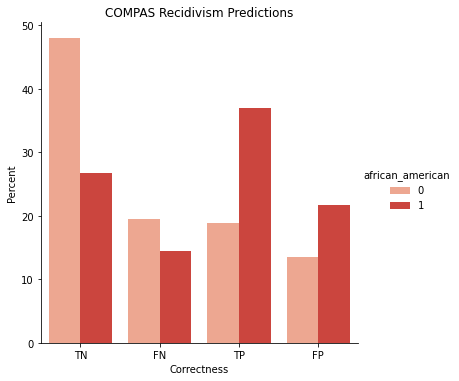

In [10]:
x,y = 'eval','african_american'

df_grouped_by_race_eval = (df
.groupby(y)[x]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

plot2b = sns.catplot(x='eval', y='percent', hue='african_american', data=df_grouped_by_race_eval, kind='bar', palette='Reds')
plot2b.set(xlabel='Correctness', ylabel='Percent', title='COMPAS Recidivism Predictions')

Plot predictions:

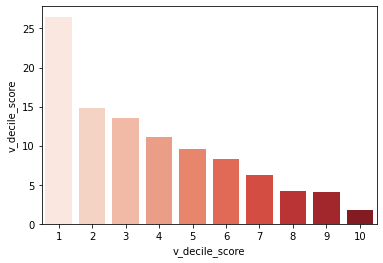

In [5]:
plot1 = sns.barplot(x="v_decile_score", y="v_decile_score", data=df, estimator=lambda x: len(x) / len(df) * 100, palette='Reds')

Plot predictions for sensitive attribute race:

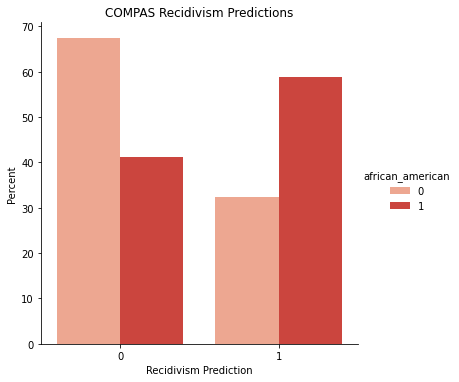

In [9]:
x,y = 'high_risk','african_american'

df_grouped_by_race_risk = (df
.groupby(y)[x]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

plot1a = sns.catplot(x=x, y='percent', hue=y, data=df_grouped_by_race_risk, kind='bar', palette='Reds')
plot1a.set(xlabel='Recidivism Prediction', ylabel='Percent', title='COMPAS Recidivism Predictions')

Plot predictions for sensitive attribute gender:

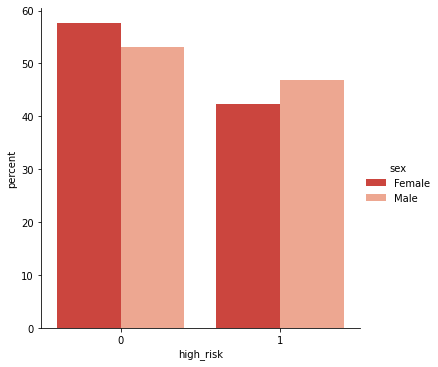

In [12]:
x,y = 'high_risk','sex'

df_grouped_by_race_risk = (df
.groupby(y)[x]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

plot2a = sns.catplot(x=x, y='percent', hue=y, data=df_grouped_by_race_risk, kind='bar', palette='Reds_r')

Plot evaluations for sensitive attribute gender:

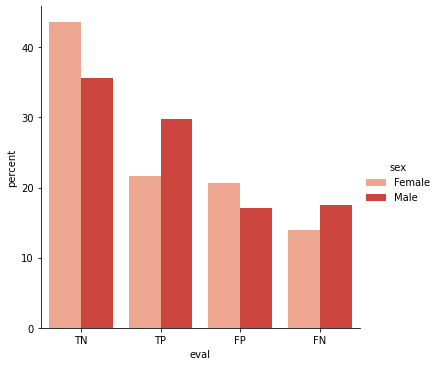

In [28]:
x,y = 'eval','sex'

df_grouped_by_race = (df
.groupby(y)[x]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

plot3 = sns.catplot(x='eval', y='percent', hue='sex', data=df_grouped_by_race, kind='bar', palette='Reds')